In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 - Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

# 2 - Input data

<Axes: >

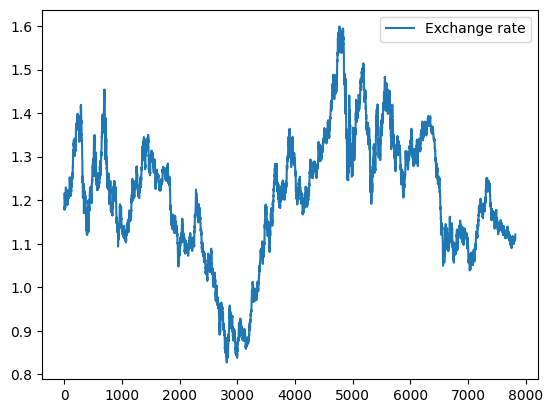

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024_FINAL_REPORT/2.EUR_USD/EUR_USD_1990_2019.csv")
data.plot()

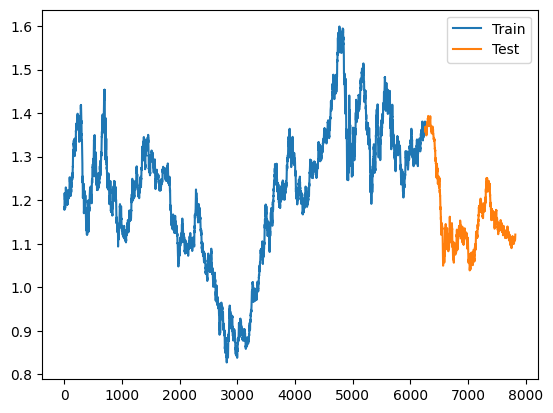

In [ ]:
data_train, data_test = train_test_split(data, test_size = 0.2, shuffle = False)
plt.plot([i for i in range(len(data_train))], data_train, label = "Train")
plt.plot([i for i in range(len(data_train), len(data_train) + len(data_test))], data_test, label = "Test")
plt.legend()
plt.show()

# 3 - Define function and class

In [ ]:
def transform(data, window_size=5):
    np_data = data.to_numpy()
    X, y = [], []
    for i in range(len(np_data) - window_size):
        X.append([j for j in np_data[i:i+window_size]])
        y.append(np_data[i+window_size])
    return np.array(X), np.array(y)

# 4 - Using GridSearchCV to compare

In [ ]:
ann_model = MLPRegressor(activation = 'relu', solver = 'sgd')

ann_param_grid = {
    'hidden_layer_sizes': [(i, ) for i in range(50, 201, 50)],
}

In [ ]:
window_size_values = [11, 22, 33]
ann_best_models = []

for w in window_size_values:
    X, y = transform(data_train, w)
    ann_grid_search = GridSearchCV(estimator = ann_model, param_grid = ann_param_grid, cv = 100, verbose = 0, scoring = "neg_mean_squared_error")
    ann_grid_search.fit(X.reshape(X.shape[0], -1), y.ravel())
    ann_best_models.append((w, ann_grid_search.best_params_, ann_grid_search.best_score_))

ann_df = pd.DataFrame(ann_best_models, columns = ["window_size", "best_params", "best_score"])
ann_df

,window_size,best_params,best_score
0,11,"{'hidden_layer_sizes': (150,)}",-0.000414
1,22,"{'hidden_layer_sizes': (200,)}",-0.000683
2,33,"{'hidden_layer_sizes': (200,)}",-0.000846


Sau khi chạy xong GridSearch ta có kết quả như sau:

In [ ]:
best_result = ann_df.loc[ann_df["best_score"].idxmax()]

In [ ]:
print("ANN best result: ")
print("_", best_result["window_size"])
print("_", best_result["best_params"])
print("_", best_result["best_score"])

ANN best result: 
_ 11
_ {'hidden_layer_sizes': (150,)}
_ -0.00041418326264861145


#5 - Test

In [ ]:
X_train, y_train = transform(data_train, best_result["window_size"])
X_test, y_test = transform(data_test, best_result["window_size"])

In [ ]:
model = MLPRegressor(hidden_layer_sizes = best_result["best_params"]["hidden_layer_sizes"], activation = "relu", solver = "sgd")
for _ in range(100):
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train.ravel())

In [ ]:
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
print("ANN mse score: ", mse(y_test.ravel(), y_pred))
print("ANN mape score: ", mape(y_test.ravel(), y_pred))

ANN mse score:  0.0003410237536511542
ANN mape score:  0.01346534643695451


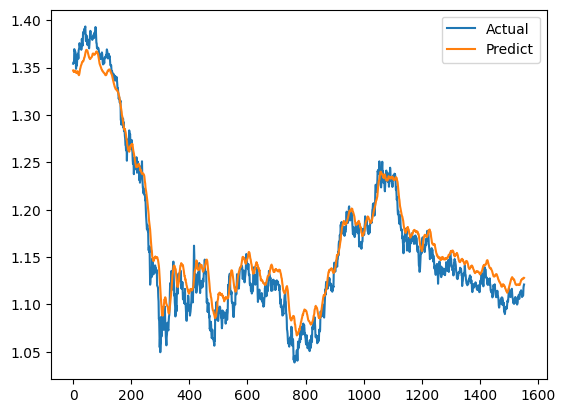

In [15]:
plt.plot(y_test, label = "Actual")
plt.plot(y_pred, label = "Predict")
plt.legend()
plt.show()

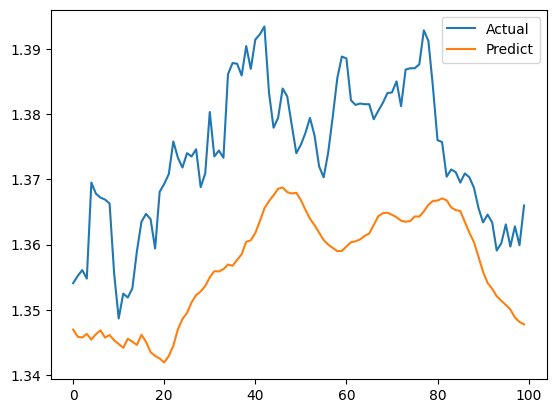

In [16]:
plt.plot(y_test[:100], label = "Actual")
plt.plot(y_pred[:100], label = "Predict")
plt.legend()
plt.show()